<a href="https://colab.research.google.com/github/tristaavrilia/fp_eti_A/blob/main/fp_eti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
!pip install requests
import gensim
from gensim.models import FastText
from gensim.models import KeyedVectors, Word2Vec

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

!pip install deep-translator
from deep_translator import GoogleTranslator

!pip install textblob
from textblob import TextBlob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


In [1]:
# import data

url = 'https://drive.google.com/uc?id=1lnxdIAsd9YVVE01SbmKoxUU-WzVriMNb'
data = pd.read_csv(url, delimiter=',', encoding='utf-8', header=0)
comment = data.iloc[:, 3]
print(comment)

NameError: name 'pd' is not defined

# NLP
Natural Language Processing

## Case folding

In [ ]:
comment_lower = comment.str.lower()

In [ ]:
comment_non_tag = comment_lower.apply(lambda x: re.sub(r'@\w+', '', x))
print(comment_non_tag.head())

0     klo kami warga indonesia paham sih pak ga usa...
1      di tik tod bngak pendukung si tri bermunculan‍️
2     tp sebenernya yaa andai pun ini bukan hoax em...
3     pidato bahasa inggris aja masih pelan2 apalag...
4                                        kasian pak de
Name: full_text, dtype: object


In [ ]:
comment_no_punc = comment_non_tag.apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
print(comment_no_punc)

0       klo kami warga indonesia paham sih pak ga usa...
1        di tik tod bngak pendukung si tri bermunculan‍️
2       tp sebenernya yaa andai pun ini bukan hoax em...
3       pidato bahasa inggris aja masih pelan2 apalag...
4                                          kasian pak de
                             ...                        
307     peliharaan penjahat mau bikin kejahatan macam...
308     orang awam tetap kena nih klw dah canggih kek...
309     menguji nyali pak kapolri  dan  apakah berani...
310      gerombolan cebong bangsat bangsa pasti bebas...
311         sundul tagar tangkapabujanda tangkapabujanda
Name: full_text, Length: 312, dtype: object


In [ ]:
comment_no_space = comment_no_punc.apply(lambda x: ' '.join(x.split()))
print(comment_no_space)

0      klo kami warga indonesia paham sih pak ga usah...
1        di tik tod bngak pendukung si tri bermunculan‍️
2      tp sebenernya yaa andai pun ini bukan hoax ema...
3      pidato bahasa inggris aja masih pelan2 apalagi...
4                                          kasian pak de
                             ...                        
307    peliharaan penjahat mau bikin kejahatan macam ...
308    orang awam tetap kena nih klw dah canggih kek ...
309    menguji nyali pak kapolri dan apakah berani me...
310    gerombolan cebong bangsat bangsa pasti bebas m...
311         sundul tagar tangkapabujanda tangkapabujanda
Name: full_text, Length: 312, dtype: object


In [ ]:
# comment_no_space.to_excel('komen.xlsx')

## Cleaning
Hapus komentar yang tidak mengandung unsur huruf/angka

In [ ]:
cleaned_comments = comment_no_space.dropna()

cleaned_comments = cleaned_comments[cleaned_comments.apply(lambda x: bool(re.search(r'[a-zA-Z0-9]', x)))]

print("Data sebelum cleaning:")
print(comment_no_space.count())
print("Data setelah cleaning:")
print(cleaned_comments.count())


Data sebelum cleaning:
312
Data setelah cleaning:
306


In [ ]:
print(cleaned_comments)

0      klo kami warga indonesia paham sih pak ga usah...
1        di tik tod bngak pendukung si tri bermunculan‍️
2      tp sebenernya yaa andai pun ini bukan hoax ema...
3      pidato bahasa inggris aja masih pelan2 apalagi...
4                                          kasian pak de
                             ...                        
307    peliharaan penjahat mau bikin kejahatan macam ...
308    orang awam tetap kena nih klw dah canggih kek ...
309    menguji nyali pak kapolri dan apakah berani me...
310    gerombolan cebong bangsat bangsa pasti bebas m...
311         sundul tagar tangkapabujanda tangkapabujanda
Name: full_text, Length: 306, dtype: object


## Formalisasi
Formalisasi Slang Words, Formalisasi Akronim & Singkatan

### Slang Words

In [ ]:
# !pip install requests

In [ ]:
# # IMPORT LIBRARY SLANG WORDS DARI GITHUB

# import requests

# # URL file Python slang_data.py
# url = 'https://raw.githubusercontent.com/Hyuto/indo-nlp/master/indoNLP/preprocessing/slang_data.py'

# response = requests.get(url)

# exec(response.text)

# print(SLANG_DATA)

In [ ]:
# # Fungsi untuk mengganti kata-kata dengan formalisasi
# def formalize_text(text):
#     words = text.split()
#     words = [SLANG_DATA[word] if word in SLANG_DATA else word for word in words]
#     return ' '.join(words)

# formalized_slang_comments = cleaned_comments.apply(formalize_text)
# print("Data setelah formalisasi:")
# print(formalized_slang_comments)

### Akronim dan Singkatan

In [ ]:
# url = "https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv"
# kamus_singkatan = pd.read_csv(url, sep=";", header=None, names=["singkatan", "formal"])

# singkatan_dict = dict(zip(kamus_singkatan["singkatan"], kamus_singkatan["formal"]))

In [ ]:
# # Fungsi untuk mengganti kata-kata dengan formalisasi
# def formalisasi_singkatan(text):
#     for singkatan, formal in singkatan_dict.items():
#         text = re.sub(r'\b' + re.escape(singkatan) + r'\b', formal, text)
#     return text

# formalized_final_comments = formalized_slang_comments.apply(formalisasi_singkatan)

# print("Data setelah formalisasi:")
# print(formalized_final_comments)

## Tokenizing
Split kalimat menjadi kata-kata

In [ ]:
# SPLIT KATA
nltk.download('punkt_tab')

pd_comments = pd.Series(cleaned_comments)
pd_comment_split = pd_comments.apply(lambda x: nltk.tokenize.word_tokenize(x))

print(pd_comment_split)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


0      [klo, kami, warga, indonesia, paham, sih, pak,...
1      [di, tik, tod, bngak, pendukung, si, tri, berm...
2      [tp, sebenernya, yaa, andai, pun, ini, bukan, ...
3      [pidato, bahasa, inggris, aja, masih, pelan2, ...
4                                      [kasian, pak, de]
                             ...                        
307    [peliharaan, penjahat, mau, bikin, kejahatan, ...
308    [orang, awam, tetap, kena, nih, klw, dah, cang...
309    [menguji, nyali, pak, kapolri, dan, apakah, be...
310    [gerombolan, cebong, bangsat, bangsa, pasti, b...
311    [sundul, tagar, tangkapabujanda, tangkapabujanda]
Name: full_text, Length: 306, dtype: object


In [ ]:
# WORD FREQUENCY
# freq_comment_cleaned = pd_comment_split.apply(lambda x: nltk.tokenize.word_tokenize(x))
# all_tokens = [word for sublist in freq_comment_cleaned for word in sublist]
# freq = FreqDist(all_tokens)

# print(freq.most_common())

In [ ]:
# freq.plot(30,cumulative=False)
# plt.show()

## Stemming
Mengembalikan menjadi induk kata

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

def stem_comments(pd_comment_split):

    return pd_comment_split.apply(stem_tokens)

pd_stemmed_comments = pd_comment_split.apply(stem_tokens)
print(pd_stemmed_comments)

0      [klo, kami, warga, indonesia, paham, sih, pak,...
1         [di, tik, tod, bngak, dukung, si, tri, muncul]
2      [tp, sebenernya, yaa, andai, pun, ini, bukan, ...
3      [pidato, bahasa, inggris, aja, masih, pelan2, ...
4                                        [kasi, pak, de]
                             ...                        
307    [pelihara, jahat, mau, bikin, jahat, macam, ap...
308    [orang, awam, tetap, kena, nih, klw, dah, cang...
309    [uji, nyali, pak, kapolri, dan, apakah, berani...
310    [gerombol, cebong, bangsat, bangsa, pasti, beb...
311    [sundul, tagar, tangkapabujanda, tangkapabujanda]
Name: full_text, Length: 306, dtype: object


## Remove Stopword
Menghapus kata-kata yang tidak memberikan kontribusi

In [ ]:
stopwords_url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/raw/indonesian-stopwords-complete.txt"
import requests
response = requests.get(stopwords_url)
custom_stopwords = set(response.text.splitlines())

factory = StopWordRemoverFactory()
default_stopwords = set(factory.get_stop_words())
all_stopwords = default_stopwords.union(custom_stopwords)

def remove_stopwords(tokens):
    return [word for word in tokens if word not in all_stopwords]

pd_filtered_comments = pd_stemmed_comments.apply(remove_stopwords).apply(lambda tokens: ' '.join(tokens))

print("Filtered comments after stopword removal:")
print(pd_filtered_comments)


Filtered comments after stopword removal:
0      klo warga indonesia paham sih ga pake alat tel...
1                     tik tod bngak dukung si tri muncul
2      tp sebenernya yaa andai hoax emang kaloo bahas...
3      pidato bahasa inggris aja pelan2 mandarinada a...
4                                                kasi de
                             ...                        
307    pelihara jahat bikin jahat bebas2 aja yg melih...
308          orang awam kena nih klw dah canggih kek gin
309         uji nyali kapolri berani proses pandang bulu
310    gerombol cebong bangsat bangsa bebas sebar fit...
311         sundul tagar tangkapabujanda tangkapabujanda
Name: full_text, Length: 306, dtype: object


##Translating

In [ ]:
# def translate_to_english(text):
#     return GoogleTranslator(source='auto', target='en').translate(text)


# pd_translated_comments = pd_filtered_comments.apply(translate_to_english)

# print("Translated comments to English:")
# print(pd_translated_comments)

In [ ]:
# row_count = pd_translated_comments.shape[0]
# print(f"Jumlah data saat ini: {row_count}")

#SVM

## Polarity and Subjectivity

In [ ]:
def sentiment_analysis(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    polarity = sentiment['compound']
    subjectivity = sentiment['neu']
    return polarity, subjectivity


In [ ]:
pd_sentiment = pd_filtered_comments.apply(lambda x: sentiment_analysis(str(x)))
pd_sentiment = pd_sentiment.apply(lambda x: pd.Series(x))
pd_sentiment.columns = ['Polarity', 'Subjectivity']
pd_merged = pd.concat([pd_filtered_comments, pd_sentiment], axis=1)

print(pd_merged.head())

                                           full_text  Polarity  Subjectivity
0  klo warga indonesia paham sih ga pake alat tel...    0.0000         1.000
1                 tik tod bngak dukung si tri muncul    0.0000         1.000
2  tp sebenernya yaa andai hoax emang kaloo bahas...   -0.2732         0.792
3  pidato bahasa inggris aja pelan2 mandarinada a...    0.0000         1.000
4                                            kasi de    0.0000         1.000


## Labeling

In [ ]:
def label_sentiment(polarity):
    if polarity > 0.1:
        return 'Positif'
    elif polarity < -0.1:
        return 'Negatif'
    else:
        return 'Netral'

In [ ]:
pd_merged['Polarity'] = pd.to_numeric(pd_merged['Polarity'], errors='coerce')
pd_merged['Analysis'] = pd_merged['Polarity'].apply(label_sentiment)

pd_final = pd_merged

pd_final.head()

,full_text,Polarity,Subjectivity,Analysis
0,klo warga indonesia paham sih ga pake alat tel...,0.0000,1.000,Netral
1,tik tod bngak dukung si tri muncul,0.0000,1.000,Netral
2,tp sebenernya yaa andai hoax emang kaloo bahas...,-0.2732,0.792,Negatif
3,pidato bahasa inggris aja pelan2 mandarinada a...,0.0000,1.000,Netral
4,kasi de,0.0000,1.000,Netral


# Result

In [ ]:
sentiment_counts = pd_final['Analysis'].value_counts()

In [ ]:
negative_count = sentiment_counts.get('Negatif', 0)
print(f"Jumlah Negatif: {negative_count}")

positive_count = sentiment_counts.get('Positif', 0)
print(f"Jumlah Positif: {positive_count}")

netral_count = sentiment_counts.get('Netral', 0)
print(f"Jumlah Netral: {netral_count}")


valid_sentiments = ['Negatif', 'Positif', 'Netral']

invalid_count = pd_final[~pd_final['Analysis'].isin(valid_sentiments)].shape[0]

print(f"Jumlah Invalid: {invalid_count}")

Jumlah Negatif: 25
Jumlah Positif: 14
Jumlah Netral: 267
Jumlah Invalid: 0


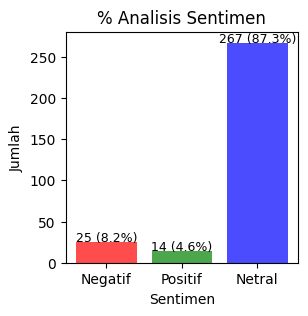

In [ ]:
categories = ['Negatif', 'Positif', 'Netral']
counts = [negative_count, positive_count, netral_count]
total = sum(counts)

percentages = [(count / total) * 100 if total > 0 else 0 for count in counts]


plt.figure(figsize=(3, 3))
plt.bar(categories, counts, color=['red', 'green', 'blue'], alpha=0.7)

plt.xlabel('Sentimen', fontsize=10)
plt.ylabel('Jumlah', fontsize=10)
plt.title('% Analisis Sentimen', fontsize=12)

for i, (count, percentage) in enumerate(zip(counts, percentages)):
    plt.text(i, count + 1, f"{count} ({percentage:.1f}%)", ha='center', fontsize=9)

plt.show()

# Evaluasi
Menggunakan 70% training data dan 30% testing data

In [ ]:
df = pd.DataFrame(pd_final)
df

,full_text,Polarity,Subjectivity,Analysis
0,klo warga indonesia paham sih ga pake alat tel...,0.0000,1.000,Netral
1,tik tod bngak dukung si tri muncul,0.0000,1.000,Netral
2,tp sebenernya yaa andai hoax emang kaloo bahas...,-0.2732,0.792,Negatif
3,pidato bahasa inggris aja pelan2 mandarinada a...,0.0000,1.000,Netral
4,kasi de,0.0000,1.000,Netral
...,...,...,...,...
307,pelihara jahat bikin jahat bebas2 aja yg melih...,0.0000,1.000,Netral
308,orang awam kena nih klw dah canggih kek gin,0.0000,1.000,Netral
309,uji nyali kapolri berani proses pandang bulu,0.0000,1.000,Netral
310,gerombol cebong bangsat bangsa bebas sebar fit...,0.0000,1.000,Netral


In [ ]:

X = df[['Polarity', 'Subjectivity']]
y = df['Analysis']

X_train_vec, X_test_vec, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = SVC(random_state=42)
svm_model.fit(X_train_vec, y_train)

y_pred = svm_model.predict(X_test_vec)

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_vec, y_train)

y_pred = svm_model.predict(X_test_vec)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Negatif       1.00      1.00      1.00         6
      Netral       0.98      1.00      0.99        79
     Positif       1.00      0.71      0.83         7

    accuracy                           0.98        92
   macro avg       0.99      0.90      0.94        92
weighted avg       0.98      0.98      0.98        92



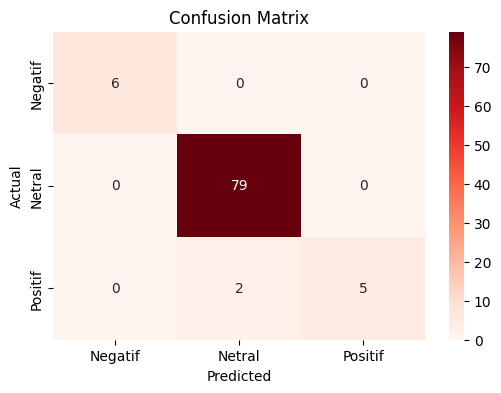

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()